# NEXUS BANK 
### Case Study: Customer Segmentation and Deposit Detection System

### Background
Nexus Bank is a financial institution dedicated to delivering unparalleled banking services to our clients. Our mission is to establish enduring relationships with our customers by providing tailored financial solutions that align with their individual needs and goals.

### Objectives
The objective of this case study is to help Nexus to optimize its operations, mitigate risks/ loan defaults, and improve customer subscription to term deposits by deducing the key insights from the customer's interaction with the bank, evaluating the effectiveness of operations and predicting the customer behaviours,

Results and outcome of this case study will help the bank to better understand their customers and enables them to tailor marketing strategies, products, and services to meet the specific need and preferences of each customer segment and improve the overall financial operations. 

### Methodology 
The methodology applied in this case study is briefly discussed as follows:

1.

### Import Libraries

In [494]:
# Data analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Classifier libraries
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Validation
from sklearn.model_selection import  cross_val_score, cross_val_predict

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

### Load the data

In [495]:
bank_data = pd.read_csv(r"C:\Users\inoke\OneDrive\デスクトップ\10Alytics\Capstone project\bank.csv")
bank_data.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


### Column dictionary
• Age: This refers to the age of the customer who holds the bank account.

• Job: This feature indicates the type of job that the customer has.

• Marital: This feature indicates the marital status of the customer, which could be "married," "divorced," or "single".

• Education: This refers to the education level of the customer, which could be "primary," "secondary," or "tertiary."

• Default: This feature indicates whether the customer has previously defaulted on a loan or credit card payment, be "yes" or "no.“
  
• Balance: This feature represents the current balance in the customer's account.

• Housing: This feature indicates whether the customer has a housing loan or not, which could be "yes" or "no."

• Loan: This feature indicates whether the customer has a personal loan or not, which could be "yes" or "no."

• Contact: This feature indicates the method of contact used to reach out to the customer, be "cellular,"  "telephone," or "unknown.“
  
• Day: This feature represents the day of the month when the customer was last contacted.

• Month: This feature represents the month of the year when the customer was last contacted.

• Duration: This feature represents the duration of the last contact with the customer, in seconds.

• Campaign: This feature represents the number of contacts made to the customer during this campaign.

• Pdays: This feature represents the number of days that passed by after the customer was last contacted from a previous campaign.
  
• Previous: This feature represents the number of contacts made to the customer before this campaign.

• Poutcome: This feature indicates the outcome of the previous marketing campaign, which could be "success," "failure," or "unknown."

• Deposit: This feature indicates whether the customer has subscribed to a term deposit, which could be "yes" or "no."

In [496]:
print(bank_data['deposit'].value_counts())

no     39922
yes     5289
Name: deposit, dtype: int64


### Data inspection and cleaning

In [497]:
bank_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,45211.0,NaN,NaN,NaN,40.93621,10.618762,18.0,33.0,39.0,48.0,95.0
job,45211,12,blue-collar,9732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,45211,3,married,27214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,45211,4,secondary,23202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,45211,2,no,44396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,45211.0,NaN,NaN,NaN,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211,2,yes,25130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,45211,2,no,37967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,45211,3,cellular,29285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,45211.0,NaN,NaN,NaN,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0


In [498]:
bank_data.shape

(45211, 17)

In [499]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [500]:
# Check for missing data

bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

Note: The data contains no missing information

In [501]:
# Check for duplicates

bank_data.duplicated().sum()

0

Note: No data duplicates

## Check for outliers

## EDA

#### Univariate analysis

In [502]:
bank_data['deposit'].value_counts()

no     39922
yes     5289
Name: deposit, dtype: int64

no     39922
yes     5289
Name: deposit, dtype: int64


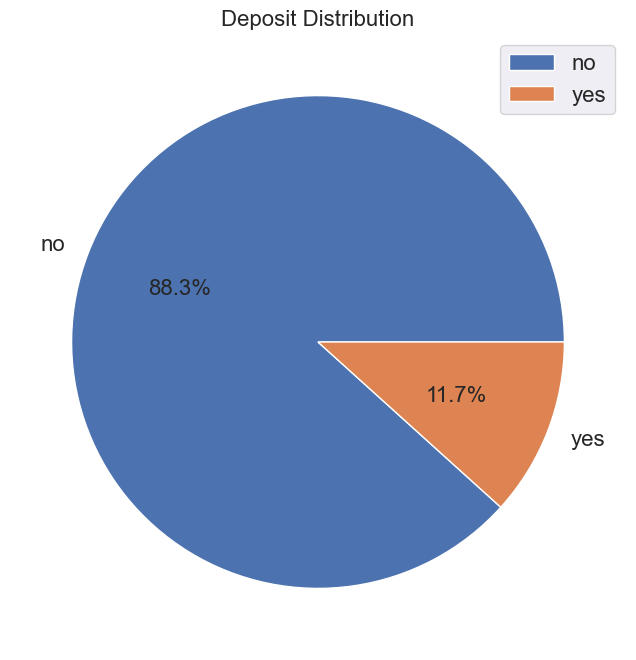

In [503]:
# Check for deposit distribution

deposit_count = bank_data['deposit'].value_counts()
plt.figure(figsize=(10,8))
plt.pie(deposit_count, labels=deposit_count.index, autopct='%1.1f%%', textprops={'fontsize': 16})
print(deposit_count)
plt.title('Deposit Distribution', fontsize=16)

plt.xticks(fontsize=16, rotation=45)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show();

Note: the number of customers who have subscribed to the term deposit is significantly less than those who have not

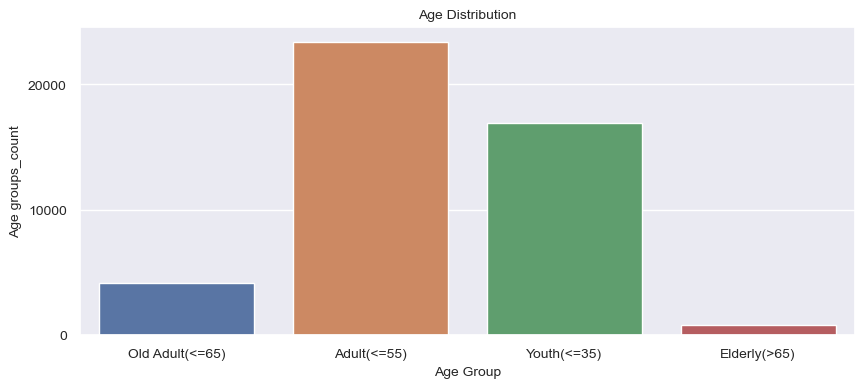

In [504]:
# Check for age distribution

# Age bracket
def age_bracket(age):
    if age <=35:
        return 'Youth(<=35)'
    elif age <=55:
        return 'Adult(<=55)'
    elif age <=65:
        return 'Old Adult(<=65)'
    else:
        return 'Elderly(>65)'
    
bank_data['age_bracket'] = bank_data['age'].apply(age_bracket)

# Investigating the age group of patients
plt.figure(figsize=(10,4))
sns.countplot(x='age_bracket', data=bank_data)
plt.xlabel('Age Group', fontsize=10)
plt.ylabel('Age groups_count', fontsize=10)
plt.title('Age Distribution', fontsize=10)


plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show();


Note: The bank has engaged the most with customers who are Adults (65-55 age) followed by the Youth, Old Adult, and Elderly in that order.

In [505]:
bank_data['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

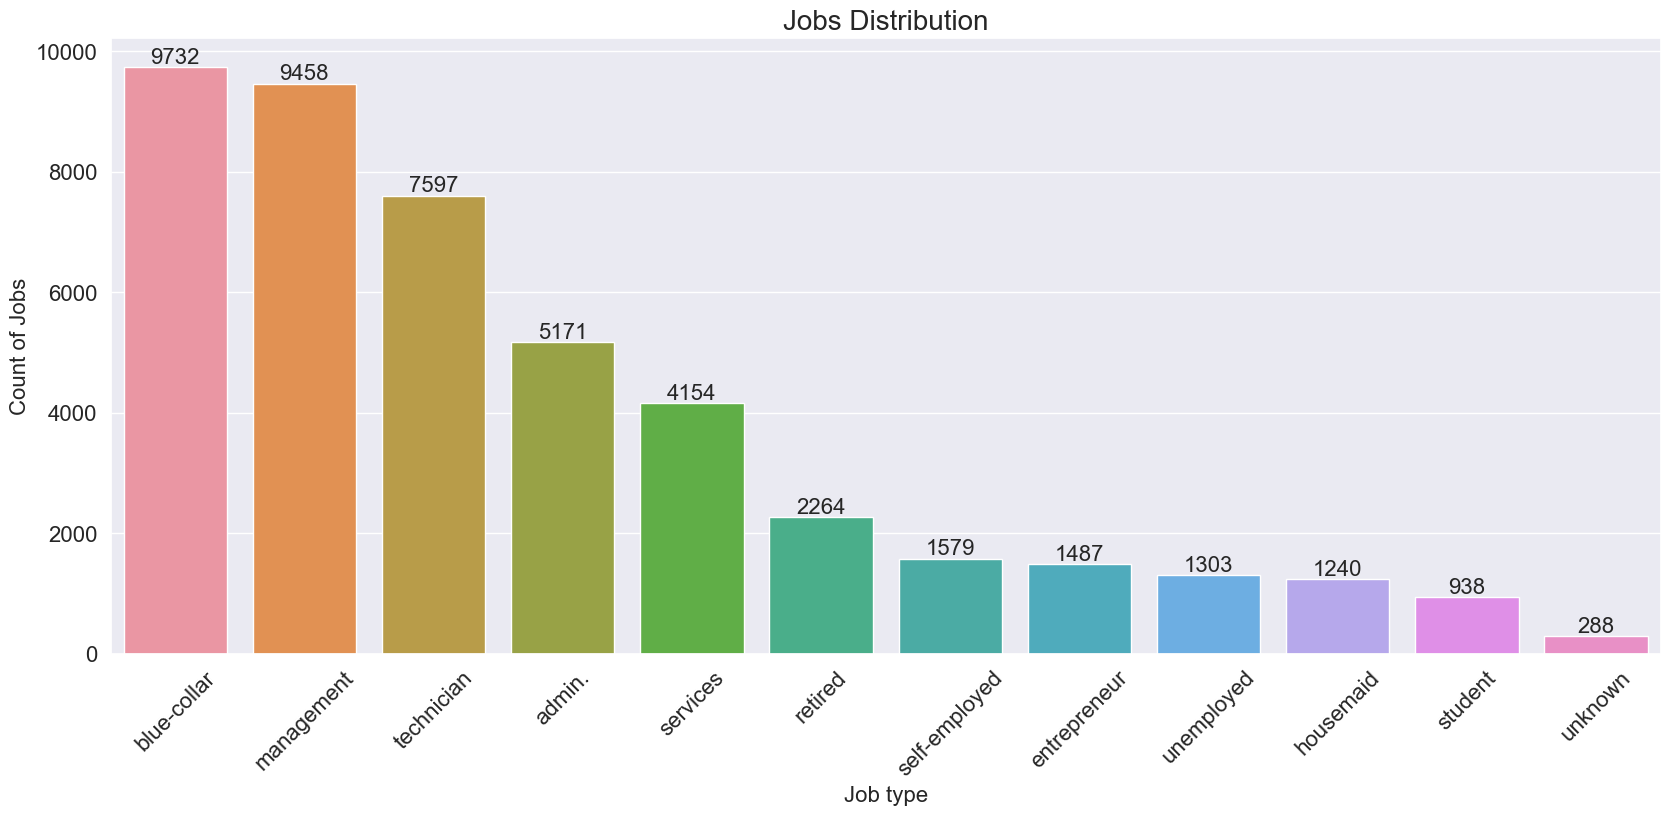

In [506]:
plt.figure(figsize=(20,8))
ax = sns.countplot(x=bank_data['job'], order=bank_data['job'].value_counts(ascending=False).index)
job_count = bank_data['job'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=job_count, fontsize=16)
plt.xlabel('Job type', fontsize=16)
plt.ylabel('Count of Jobs', fontsize=16)
plt.title('Jobs Distribution', fontsize=20)

plt.xticks(fontsize=16, rotation=45)
plt.yticks(fontsize=16)
plt.show();

Note: The bank has engaged the most with customers who works in a blue-collar jobs, followed closely with those working in management. The least engagement is shown for those with unknown jobs followed up with students

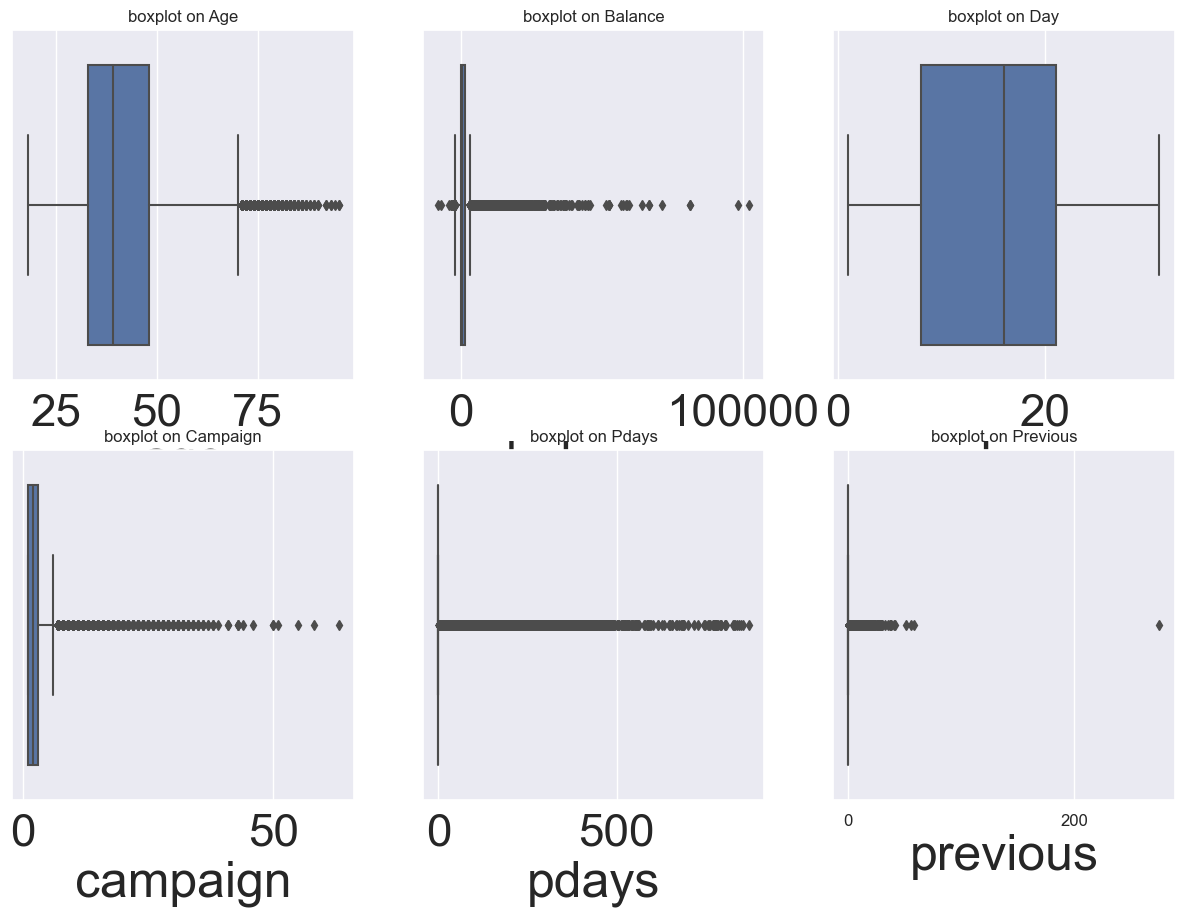

In [507]:
# Check for outliers
# Quantity, cost, Revenue and Profit - Subplot

fig,axs = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

sns.boxplot(x='age', data=bank_data, ax=axs[0,0])
axs[0,0].set_title('boxplot on Age', fontsize=12)

sns.boxplot(x='balance', data=bank_data , ax=axs[0,1])
axs[0,1].set_title('boxplot on Balance', fontsize=12)

sns.boxplot(x='day', data=bank_data , ax=axs[0,2])
axs[0,2].set_title('boxplot on Day', fontsize=12)

sns.boxplot(x='campaign', data=bank_data , ax=axs[1,0])
axs[1,0].set_title('boxplot on Campaign', fontsize=12)

sns.boxplot(x='pdays', data=bank_data , ax=axs[1,1])
axs[1,1].set_title('boxplot on Pdays', fontsize=12)

sns.boxplot(x='previous', data=bank_data , ax=axs[1,2])
axs[1,2].set_title('boxplot on Previous', fontsize=12)


plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show();


Note: There is a presence of outliers in the features including Age, Balance, Campaign, Pdays and Previous. Meanwhile the day variable has displayed no outliers.

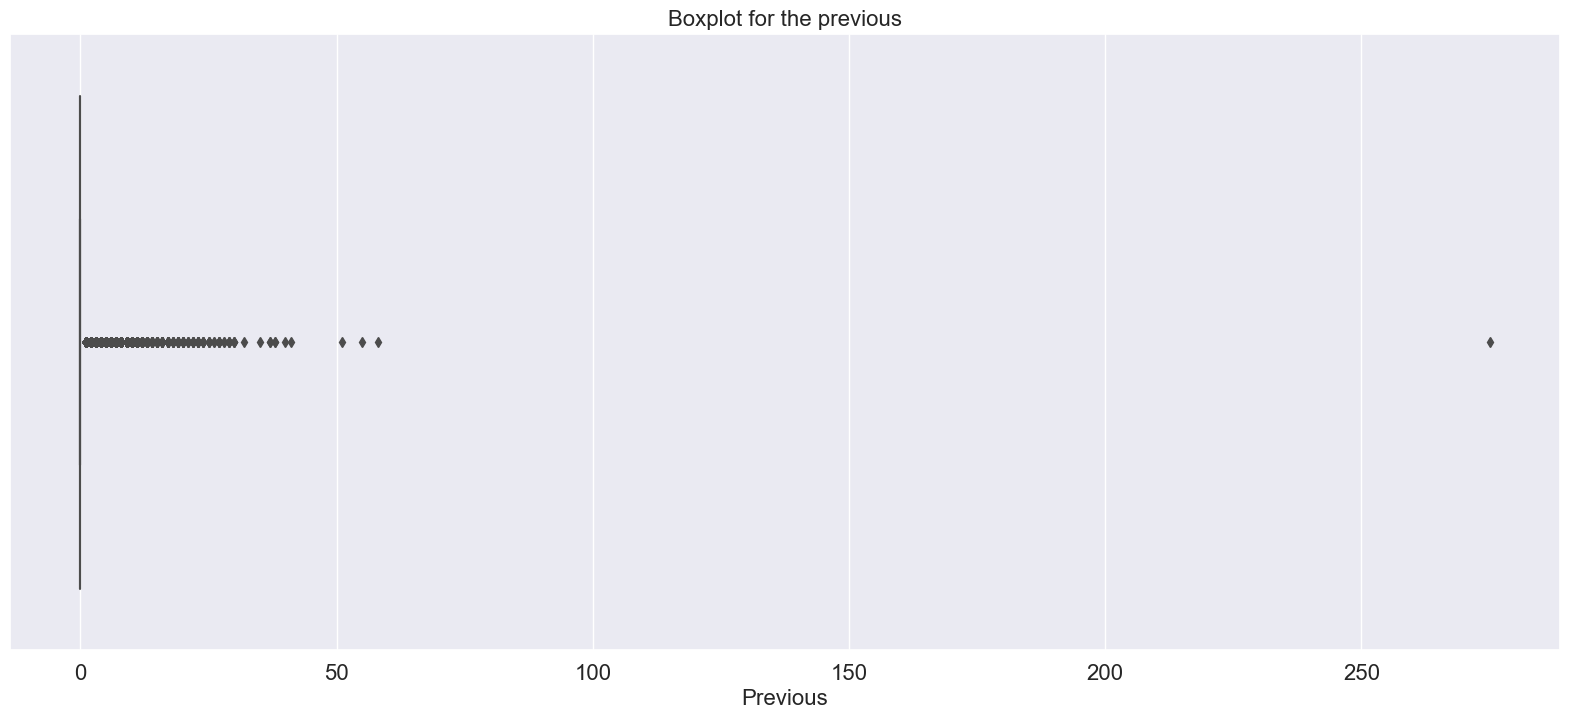

In [508]:
plt.figure(figsize=(20,8))
sns.boxplot(x=bank_data['previous'])
plt.title('Boxplot for the previous', fontsize=16)
plt.xlabel('Previous', fontsize=16)


plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show();

Note: There are outliers detected for the previous variable

### Bivariate analysis

In [509]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          45211 non-null  object
 2   marital      45211 non-null  object
 3   education    45211 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      45211 non-null  object
 9   day          45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     45211 non-null  object
 16  deposit      45211 non-null  object
 17  age_bracket  45211 non-null  object
dtypes: int64(7), object(11)
memory usage: 6.2+ MB


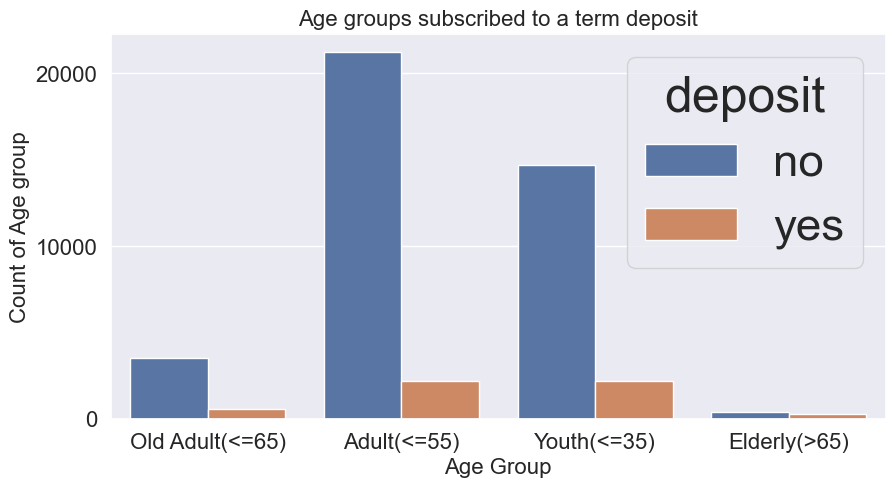

In [510]:
# Investigating the Age group of people and the deposit variable

plt.figure(figsize=(10,5))
sns.countplot(x='age_bracket', data=bank_data, hue='deposit')
plt.xlabel('Age Group', fontsize=16)
plt.ylabel('Count of Age group',fontsize=16)
plt.title('Age groups subscribed to a term deposit', fontsize=16)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show();

Note: A great number of customers have not subscribed to the term deposit across all age_grops compared to those who have subscribed

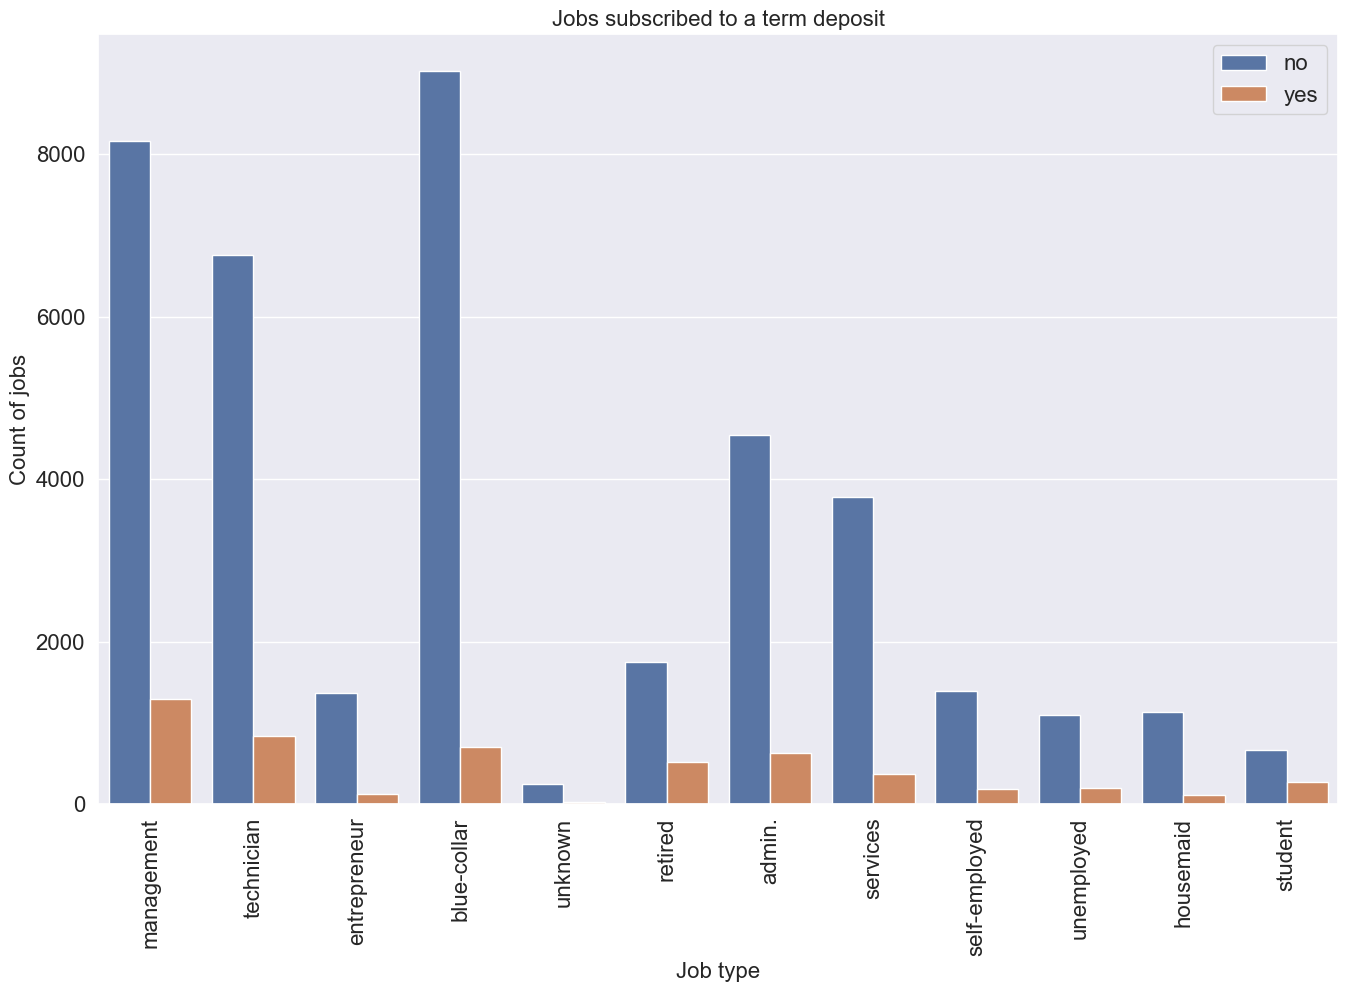

In [511]:
# Investigating the job type and the deposit variable

plt.figure(figsize=(16,10))
sns.countplot(x='job', data=bank_data, hue='deposit')
plt.xlabel('Job type', fontsize=16)
plt.ylabel('Count of jobs', fontsize=16)
plt.title('Jobs subscribed to a term deposit', fontsize=16)

plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16);

Note: A great number of customers have not subscribed to the term deposit across all types of jobs compared to those who have subscribed. However, a slightly less disparity for those who have subscribed and those who have not, is noticed for the students.

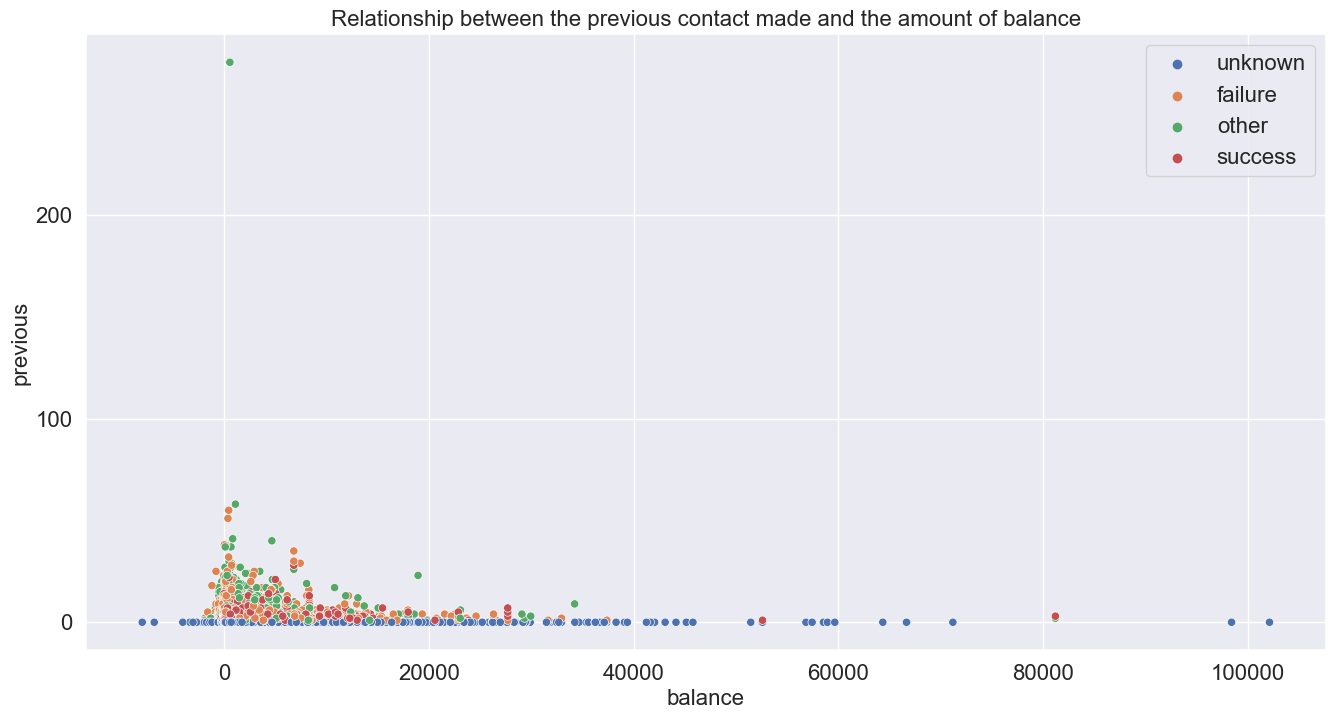

In [512]:
# Checking the association of the Previous contacts made and the outcome of the operations

plt.figure(figsize=(16,8))
sns.scatterplot(x='balance', y='previous', data=bank_data, hue='poutcome')
plt.xlabel('balance', fontsize=16)
plt.ylabel('previous', fontsize=16)
plt.title('Relationship between the previous contact made and the amount of balance', fontsize=16)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16);

<Figure size 1000x400 with 0 Axes>

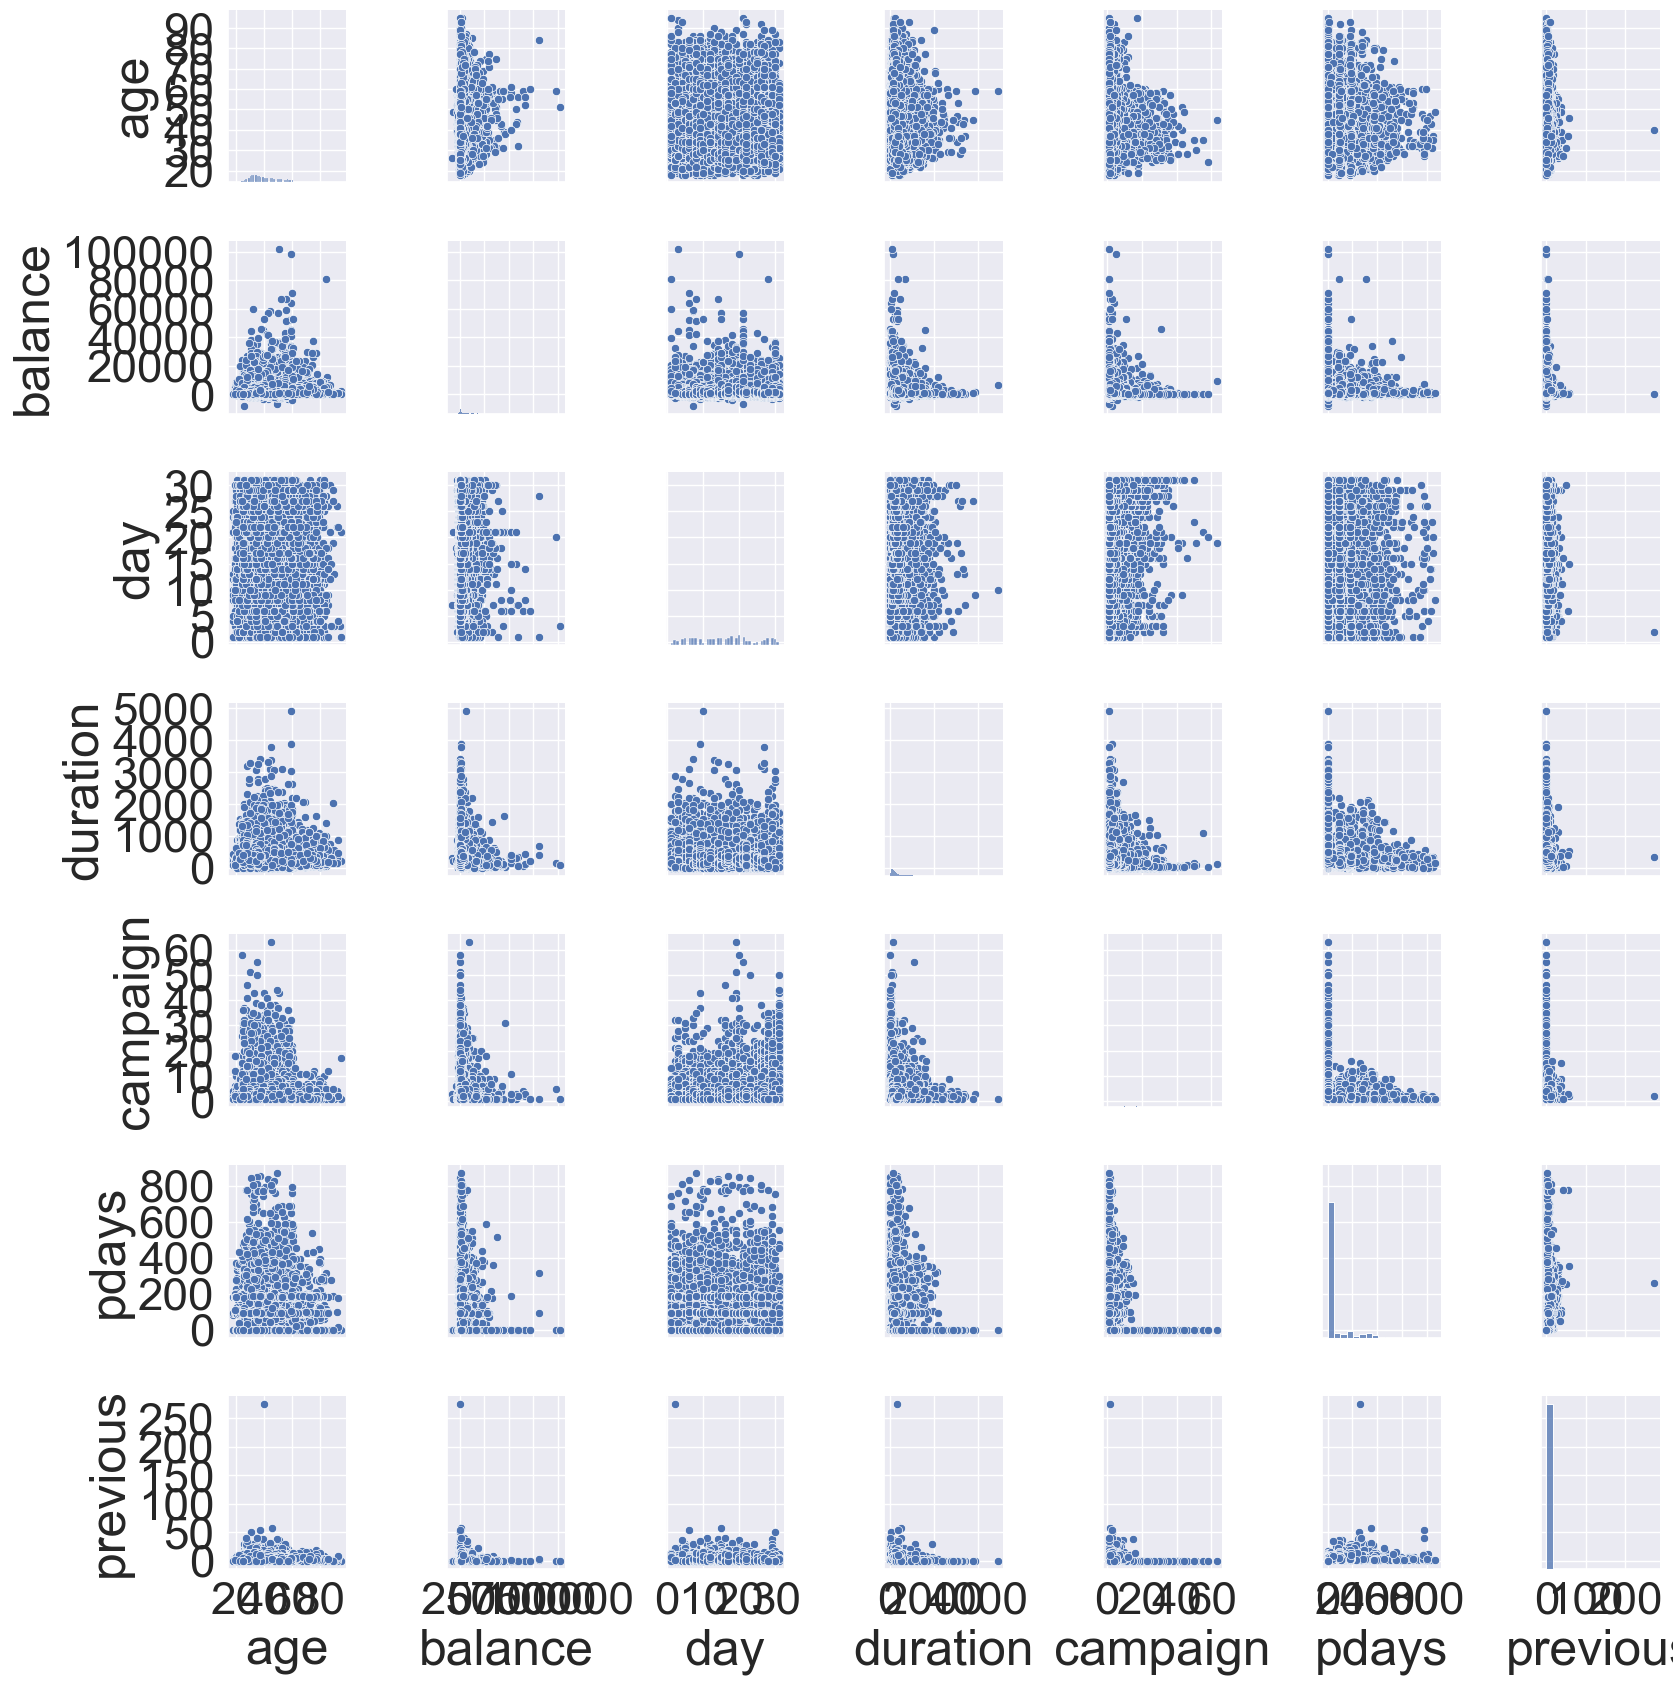

In [513]:
plt.figure(figsize=(10,4))
sns.pairplot(bank_data)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.set(font_scale=0.5)

#plt.legend(fontsize=10);


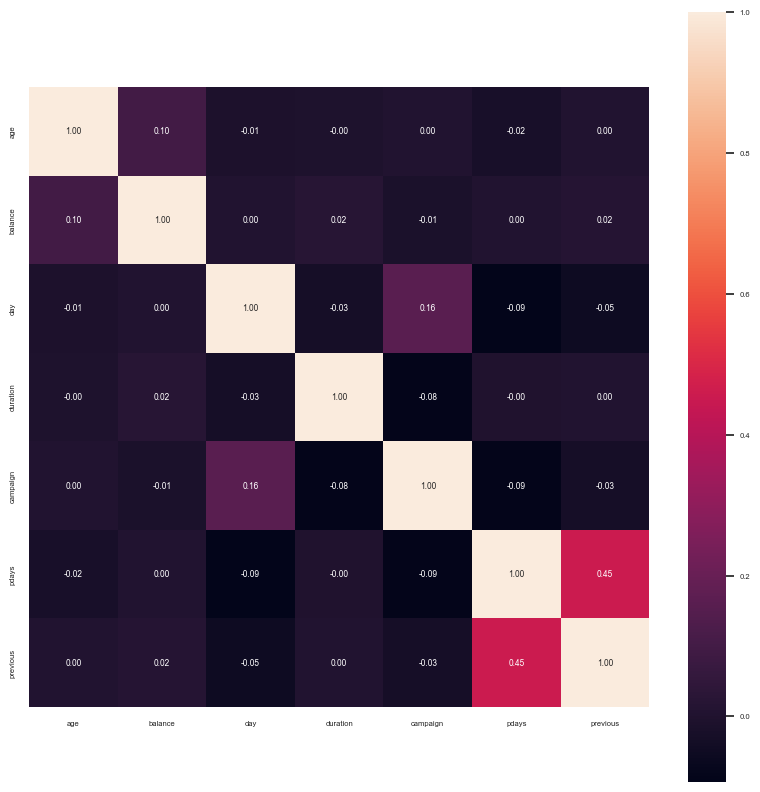

In [514]:
# Check for correlation in our features

plt.figure(figsize=(10,10))
#sns.heatmap(bank_data.corr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10})
sns.heatmap(bank_data.corr(), cbar=True, annot=True, square=True, fmt='.2f')
sns.set(font_scale=2)


### Feature Engineering

#### Data preprocessing

In [515]:
# check the amount of unknown variables in the feature contact

total_unknowns = bank_data[bank_data['contact']=='unknown'].value_counts().sum()
total_variables = bank_data['contact'].value_counts().sum()
ratio = (total_unknowns/total_variables)*100
print(f'the percentage of unknowns in the contact is {ratio}%')


the percentage of unknowns in the contact is 28.798301298356595%


Note: Since the number of unknown variables for the contact feature is not significantly high (<60%), the contact feature is still viable to be used in the proceeding steps of model

In [516]:
# check the amount of unknown variables in the feature poutcome

total_unknowns = bank_data[bank_data['poutcome']=='unknown'].value_counts().sum()
total_variables = bank_data['poutcome'].value_counts().sum()
ratio = (total_unknowns/total_variables)*100
print(f'the percentage of unknowns in the poutcome is {ratio}%')

the percentage of unknowns in the poutcome is 81.74780473778506%


Note: Since the number of unknown variables for the contact feature is significantly high (i.e. >60%), the poutcome columns will not be considered in training the model. 

In [517]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,age_bracket
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Old Adult(<=65)
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Adult(<=55)
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Youth(<=35)
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Adult(<=55)
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Youth(<=35)


In [518]:
# Drop poutcome column as it has high number of unknown variables, also drop the age_bracket since it is similar to the age column

bank_data.drop(['poutcome', 'age_bracket'], axis=1, inplace=True)
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,no


In [519]:
# Let us transform deposit column into numerical attributes
# We will assign "no"  as 0 and "yes"  as 1

bank_data['deposit'] = bank_data['deposit'].map({'no': 0, 'yes': 1})

In [520]:
# Identifying the categorical and the numerical dataset
categorical = []
numerical = []

for i in bank_data.columns:
    if bank_data[i].dtype=='O': 
        categorical.append(i)
    else:
        numerical.append(i)
        
print(categorical, numerical, sep='\n\n\n')

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month']


['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'deposit']


## Classifier model

### Split the data

In [531]:
# Splitting the independent from the dependent columns

bank_data1 = bank_data.copy()
X = bank_data1.drop(['deposit'], axis=1)
y = bank_data1['deposit']

print(bank_data1.shape)
print(X.shape)
print(y.shape)

(45211, 16)
(45211, 15)
(45211,)


In [532]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0


In [533]:
display(y.value_counts())

0    39922
1     5289
Name: deposit, dtype: int64

### Train-Test Split

In [535]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =42) 

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(31647, 15)
(13564, 15)
(31647,)
(13564,)


### Encoding the cagegorical variables

In [536]:
# Encoding using one hot encoding

# Apply pd.get_dummies on training and test data

X_train = pd.get_dummies(X_train, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month'])
X_test = pd.get_dummies(X_test, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month'])

# Align the columns of the encoded test set with the columns of the encoded training set
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [526]:
display(X_train.head())
display(X_test.head())


,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
10747,36,0,17,153,4,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
26054,56,196,19,312,3,-1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
9125,46,0,5,83,2,-1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
41659,41,3426,1,302,1,119,5,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4443,38,0,20,90,1,-1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
3776,40,580,16,192,1,-1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
9928,47,3644,9,83,2,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
33409,25,538,20,226,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31885,42,1773,9,311,1,336,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15738,56,217,21,121,2,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


### Feature Scaling

In [537]:
# Robust Scaler is preferred here due to the large amount of outliers in the datasets

from sklearn.preprocessing import RobustScaler

X_train[list(X_train.select_dtypes(exclude=['object']).columns)] = RobustScaler().fit_transform(X_train[list(X_train.select_dtypes(exclude=['object']).columns)])
X_test[list(X_test.select_dtypes(exclude=['object']).columns)] = RobustScaler().fit_transform(X_test[list(X_test.select_dtypes(exclude=['object']).columns)])


In [538]:
display(X_train.head())
display(X_test.head())
display(X_train.shape)
display(X_test.shape)

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
10747,-0.200000,-0.326979,0.076923,-0.125000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
26054,1.133333,-0.183284,0.230769,0.611111,0.5,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9125,0.466667,-0.326979,-0.846154,-0.449074,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
41659,0.133333,2.184751,-1.153846,0.564815,-0.5,120.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4443,-0.066667,-0.326979,0.307692,-0.416667,-0.5,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
3776,0.066667,0.094899,0.000000,0.051163,-0.5,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9928,0.533333,2.393473,-0.538462,-0.455814,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
33409,-0.933333,0.063391,0.307692,0.209302,-0.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31885,0.200000,0.989872,-0.538462,0.604651,-0.5,337.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15738,1.133333,-0.177419,0.384615,-0.279070,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


(31647, 47)

(13564, 47)

### Classifier Selection

Classifier: Decision Tree

Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     11966
           1       0.46      0.47      0.47      1598

    accuracy                           0.87     13564
   macro avg       0.70      0.70      0.70     13564
weighted avg       0.87      0.87      0.87     13564



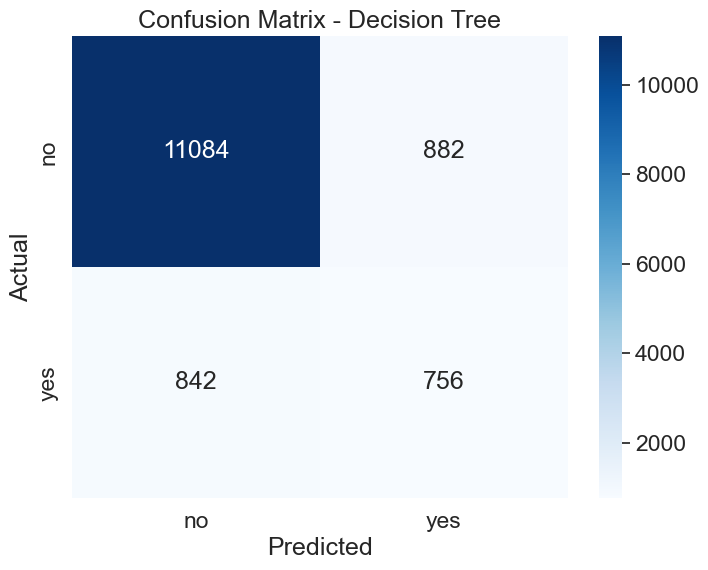





Classifier: K-Nearest Neighbors

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     11966
           1       0.57      0.33      0.42      1598

    accuracy                           0.89     13564
   macro avg       0.75      0.65      0.68     13564
weighted avg       0.88      0.89      0.88     13564



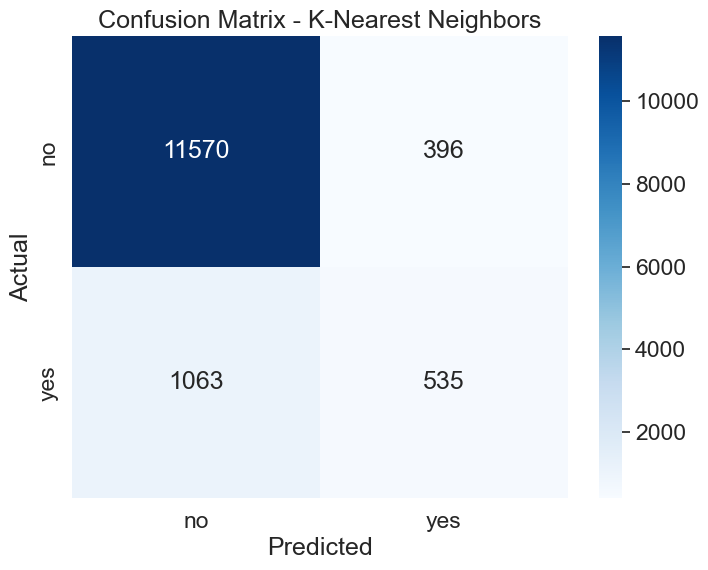





Classifier: Support Vector Machine

Classification Report:

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     11966
           1       0.00      0.00      0.00      1598

    accuracy                           0.88     13564
   macro avg       0.44      0.50      0.47     13564
weighted avg       0.78      0.88      0.83     13564



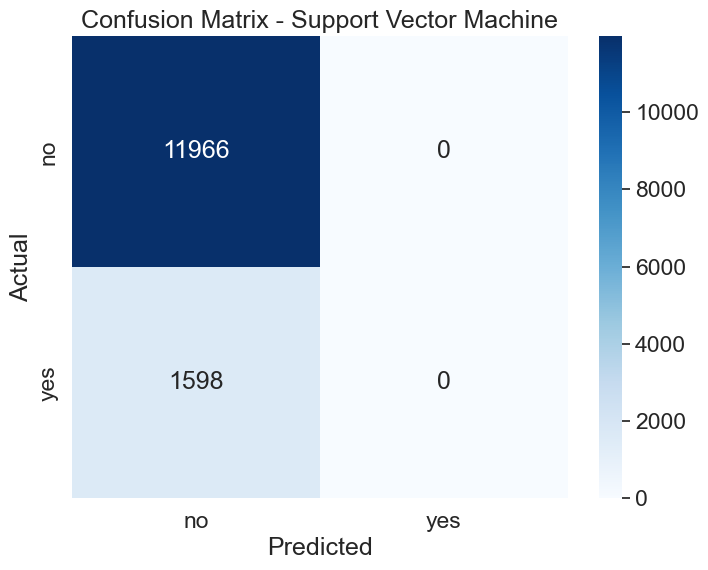





Classifier: Logistic Regression

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     11966
           1       0.58      0.24      0.34      1598

    accuracy                           0.89     13564
   macro avg       0.74      0.61      0.64     13564
weighted avg       0.87      0.89      0.87     13564



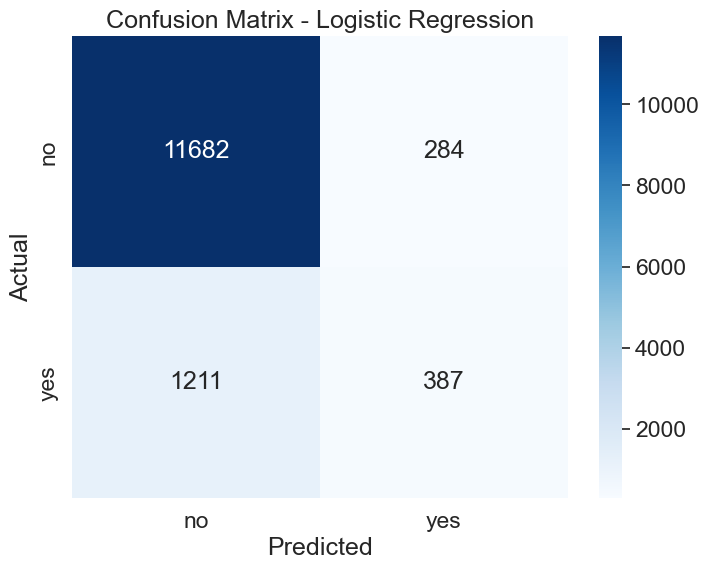





Classifier: Random Forest

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11966
           1       0.64      0.38      0.47      1598

    accuracy                           0.90     13564
   macro avg       0.78      0.67      0.71     13564
weighted avg       0.89      0.90      0.89     13564



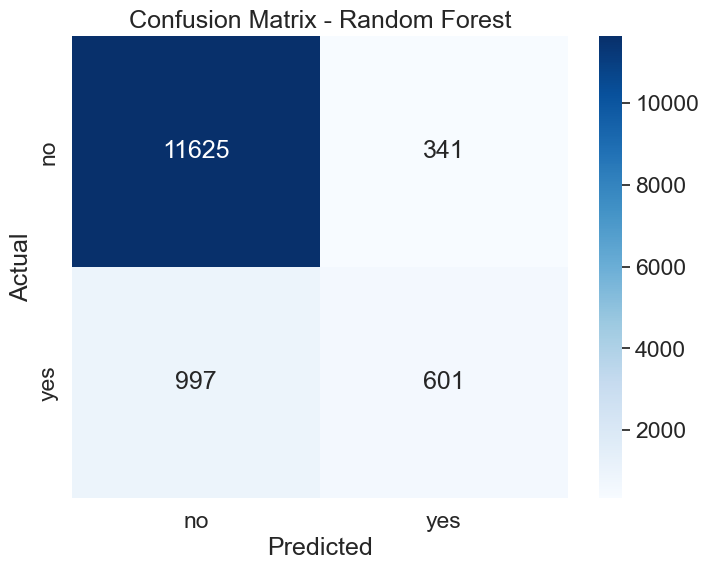





Classifier: Naive Bayes

Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.90      0.91     11966
           1       0.37      0.47      0.41      1598

    accuracy                           0.84     13564
   macro avg       0.65      0.68      0.66     13564
weighted avg       0.86      0.84      0.85     13564



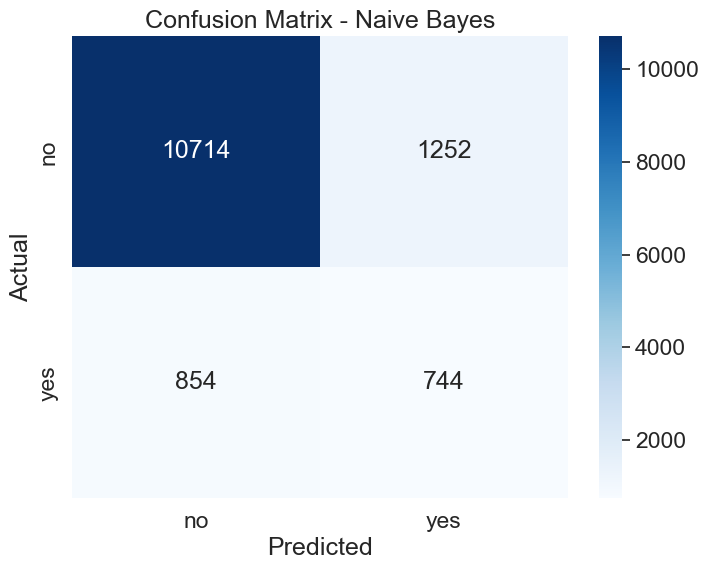





Classifier: Gradient Boosting Machine

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11966
           1       0.64      0.39      0.48      1598

    accuracy                           0.90     13564
   macro avg       0.78      0.68      0.71     13564
weighted avg       0.89      0.90      0.89     13564



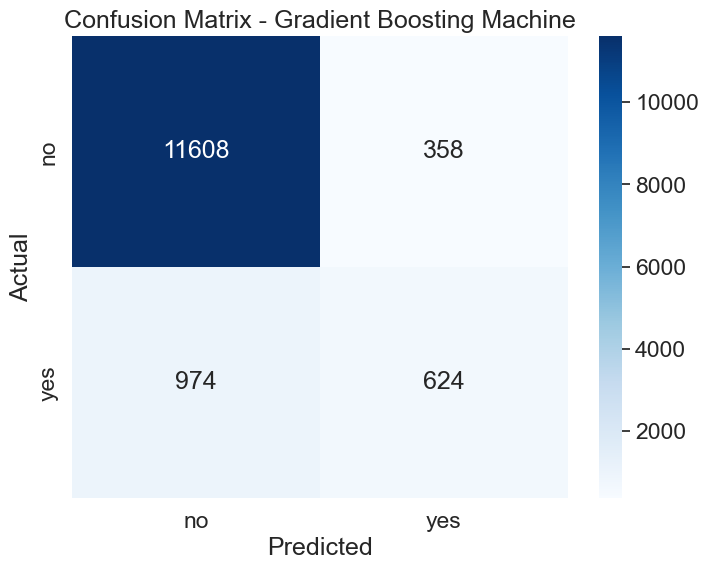





Classifier: XGBoost

Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     11966
           1       0.63      0.48      0.54      1598

    accuracy                           0.90     13564
   macro avg       0.78      0.72      0.74     13564
weighted avg       0.90      0.90      0.90     13564



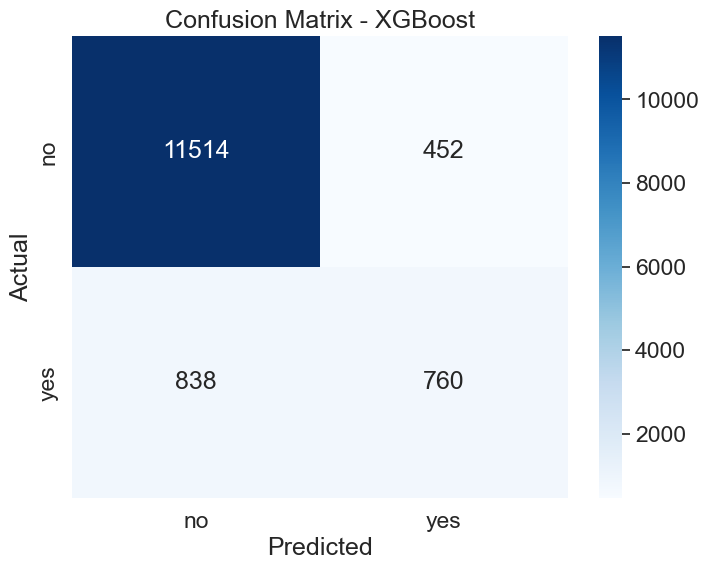

In [540]:
classifiers = [
    (DecisionTreeClassifier(), "Decision Tree"),
    (KNeighborsClassifier(), "K-Nearest Neighbors"),
    (SVC(), "Support Vector Machine"),
    (LogisticRegression(), "Logistic Regression"),
    (RandomForestClassifier(), "Random Forest"),
    (GaussianNB(), "Naive Bayes"),
    (GradientBoostingClassifier(), "Gradient Boosting Machine"),
    (xgb.XGBClassifier(), "XGBoost")
]

# Iterate through the list of classifiers
for classifier, name in classifiers:
    # Train the classifier
    classifier.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = classifier.predict(X_test)
    
    # Print the classifier's name
    print("Classifier:", name)
    
    # Print the classification report
    print("\nClassification Report:\n")
    print(classification_report(y_test, y_pred))
    
  
    
    # Create Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    # Plotting the confusion matrix with colors
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['no','yes'], yticklabels=['no','yes'])
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    sns.set(font_scale=1.5)
    
    # Add a separator for clarity
    
    print("="*100)
    print('\n\n\n')

In [ ]:

metrics_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])


for classifier, name in classifiers:
    y_pred = classifier.predict(X_test)  # Replace X_test with your test data
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    metrics_df = metrics_df.append({'Model': name, 'Accuracy': accuracy, 'Precision': precision,
                                    'Recall': recall, 'F1-Score': f1}, ignore_index=True)
    metrics_df = metrics_df.sort_values(by='F1-Score', ascending=False)

display(metrics_df)


Note: XGBoost classifier has shown to have the highest performance across all evaluation metrics, followed up by other classifiers in the following order: 

       a) Random Forest; 
       b) Gradient Boosting Machine;
       c) K-Nearest Neighbors;
       d) Decision Tree;
       e) Logistic Regression;
       f) Naive Bayes; and 
       g) Support Vector Machine
       

In [ ]:
# Measuring the power of influence among the features used in the classifier model

importances = classifier.feature_importances_

feature_names = X_train.columns  # Replace with the actual feature names or column labels
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)


Note: The feature named "contact-unknown" which implies the unknown contact method during the campaign operation has shown to have highest influence among other features used in the model. The second most influential feature is attribute of customers having no housing loan. On the other hand, the least most influential attribute is for the customers who have defaulted the loans previously.

In Conclusion, after evaluating several machine learning models, we have determined that the XGBoost classifier outperforms the other classifiers based on multiple evaluation metrics. It achieved the highest scores for the overall accuracy of 0.904, and the F1-score of 0.899. . Additionally, the XGBoost classifier demonstrates excellent precision and recall scores, indicating its ability to correctly classify positive instances while minimizing false positives and false negatives. The superior performance of the XGBoost classifier makes it the best choice for our specific problem, providing reliable predictions and high-quality results.

## Segmentation model

### Importing clustering libraries

In [550]:
# Machine learning and Evaluation
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, homogeneity_score

In [551]:
bank_data.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

### Encoding categorical features

In [556]:
bank_data = bank_data1
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,0


In [557]:
# Encoding using one hot encoding

# Apply pd.get_dummies on training and test data

bank_data = pd.get_dummies(bank_data, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month'])

display(bank_data)

,age,balance,day,duration,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,33,2,5,76,1,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,47,1506,5,92,1,-1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
45207,71,1729,17,456,2,-1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
45208,72,5715,17,1127,5,184,3,1,0,0,...,0,0,0,0,0,0,0,1,0,0
45209,57,668,17,508,4,-1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


### Feature scaling

In [558]:
# Robust Scaler is preferred here as it is more robust to outliers

from sklearn.preprocessing import RobustScaler

bank_data[list(bank_data.select_dtypes(exclude=['object']).columns)] = RobustScaler().fit_transform(bank_data[list(bank_data.select_dtypes(exclude=['object']).columns)])

# scaler = RobustScaler()

# X_train = scaler.fit_transform(X_train)
# X_test = scaler.fit_transform(X_test)

In [559]:
bank_data

,age,balance,day,duration,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,1.266667,1.250000,-0.846154,0.375000,-0.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.333333,-0.308997,-0.846154,-0.134259,-0.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.400000,-0.328909,-0.846154,-0.481481,-0.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.533333,0.780236,-0.846154,-0.407407,-0.5,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.400000,-0.329646,-0.846154,0.083333,-0.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.800000,0.278024,0.076923,3.689815,0.5,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45207,2.133333,0.944690,0.076923,1.277778,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45208,2.200000,3.884218,0.076923,4.384259,1.5,185.0,3.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45209,1.200000,0.162242,0.076923,1.518519,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Determining the optimal number of clusters

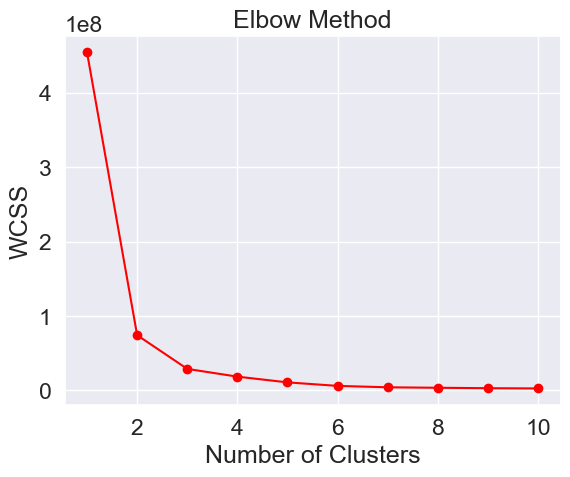

In [560]:
# Determine the optimal number of clusters using the elbow approach
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(bank_data)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss, color='red', marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Note: the optimal number of cluster is selected as 3 based on the elbow plot

In [597]:
# Fit K-means Clustering model
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(bank_data)

# Add cluster labels to data
bank_data['Cluster'] = kmeans.labels_

#### Evaluate the clusters

In [598]:
# Calculate the Silhouette score
from sklearn.metrics import silhouette_score

silhoutte_score = silhouette_score(bank_data, kmeans.labels_)
print(f'the silhouette score using the k-means clustering is {silhoutte_score}')

the silhouette score using the k-means clustering is 0.8987066285818472


Note: the silhoutte score of 0.898 indicates a strong clustering patterns within the data. That segments are well-separated into distinct clusters, with minimal overlap or misclassification.

Overall, this score points that describes that the clustering algorithm was able to accurately separate the variables into cohesive groups which can be helpful segmenting homogenous elements and patterns within customers.

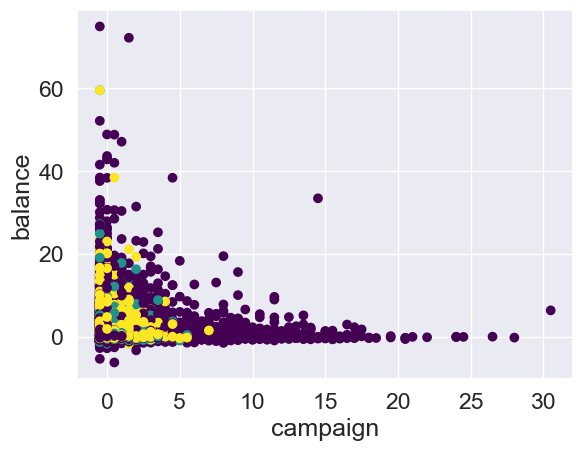

In [599]:
# Visualize cluster results
plt.scatter(x='campaign', y= 'balance', data=bank_data, c=bank_data['Cluster'], label='Centroids', cmap='viridis')
plt.xlabel('campaign')
plt.ylabel('balance')
plt.show()

Note: two visible segments are clearly generated, one segment describing less amount of contact made during this campaign for most of customers with balance less than 30. And the other segment consisting mostly with customers who contacted more often with diverse range of balance

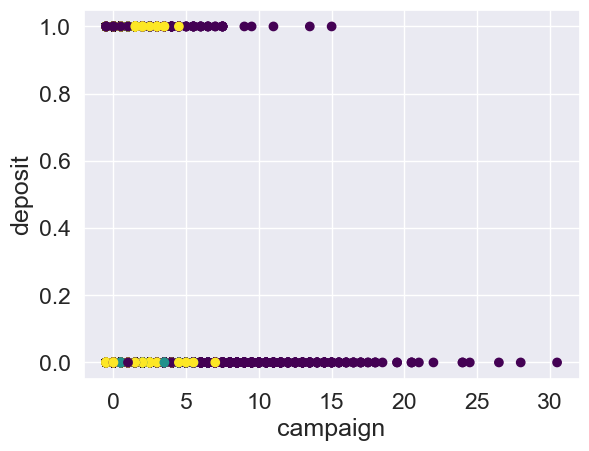

In [600]:
# Visualize cluster results
plt.scatter(bank_data['campaign'], bank_data['deposit'], c=bank_data['Cluster'], label='Centroids', cmap='viridis')
plt.xlabel('campaign')
plt.ylabel('deposit')
plt.show()


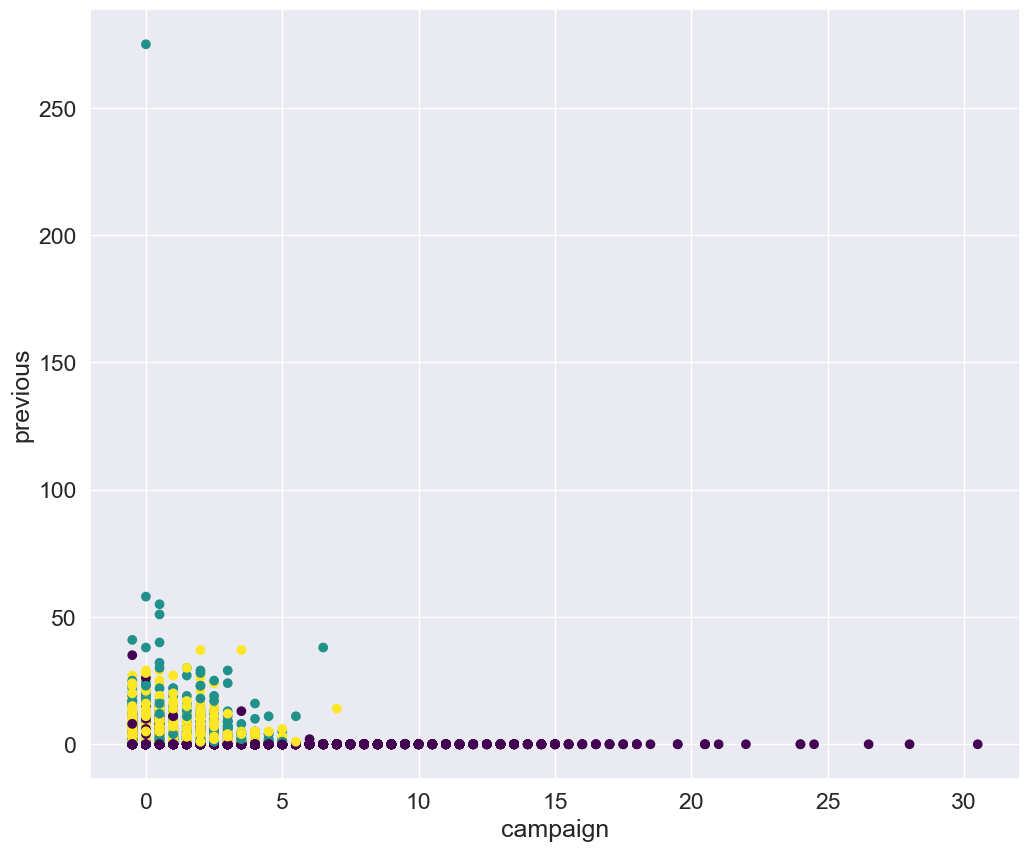

In [601]:
# Visualize cluster results
plt.figure(figsize=(12,10))
plt.scatter(x='campaign', y= 'previous', data=bank_data, c=bank_data['Cluster'], label='Centroids', cmap='viridis')
plt.xlabel('campaign')
plt.ylabel('previous')
plt.show()


In [603]:
# Count the number of samples in each cluster
unique, counts = np.unique(bank_data['Cluster'], return_counts=True)

# Print the number of samples in each cluster
for cluster, count in zip(unique, counts):
    print(f"Cluster {cluster}: {count} samples")

Cluster 0: 37318 samples
Cluster 1: 3581 samples
Cluster 2: 4312 samples


Note: Despite a good score with regard to the silhoutte metric, the k-means clustering have shown huge difference between the sizes of the clusters which can impede its performance. 